In [1]:
import pandas as pd
from pandas import ExcelFile
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend as mlx
import xlrd as xl
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
df = pd.read_excel('C:\\Users\\84346\\Downloads\\Tài liệu hướng dẫn thực hành buổi 2-20220330\\Data\\Online Retail1.xlsx')

In [4]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [5]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [6]:
df[df.InvoiceNo.str.contains('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [7]:
df = df[~df['InvoiceNo'].str.contains('C')]

<AxesSubplot:>

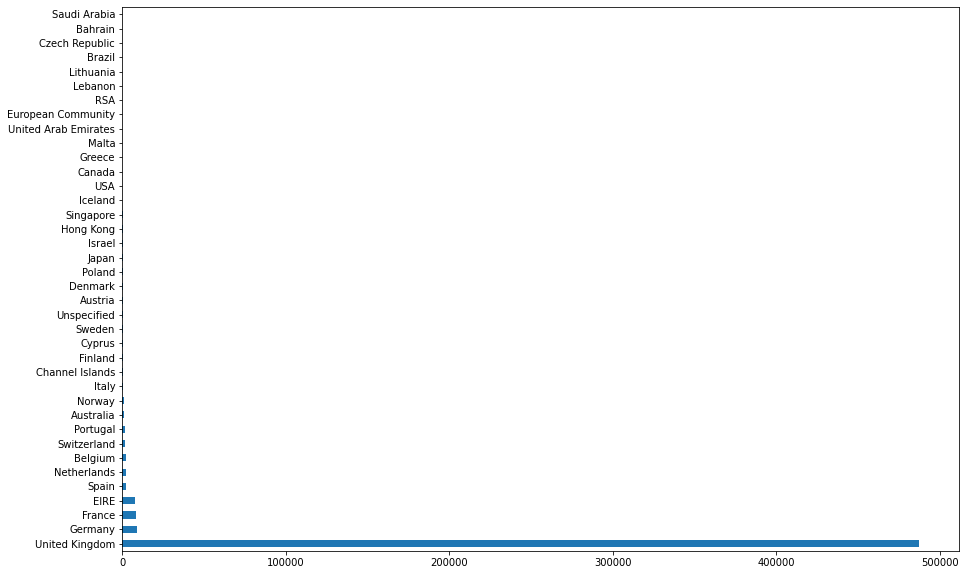

In [8]:
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

In [9]:
basket = df[df['Country'] == "France"].groupby(['InvoiceNo', 'Description'])['Quantity']

In [10]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [11]:
basket.head(10)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537468,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

In [13]:
basket = basket.applymap(encode_data)

In [14]:
basket.drop('POSTAGE', inplace=True, axis=1)

In [15]:
itemsets = apriori(basket, min_support=0.07, use_colnames=True)

In [16]:
itemsets.head(10)

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


In [17]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.7)

In [18]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         20 non-null     object 
 1   consequents         20 non-null     object 
 2   antecedent support  20 non-null     float64
 3   consequent support  20 non-null     float64
 4   support             20 non-null     float64
 5   confidence          20 non-null     float64
 6   lift                20 non-null     float64
 7   leverage            20 non-null     float64
 8   conviction          20 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.5+ KB


In [19]:
rules["antecedents"]=rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"]=rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [20]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], '==>', rules.loc[i, 'consequents'],
         ' [', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE PINK ==> ALARM CLOCK BAKELIKE GREEN  [ 0.07397959183673469 ,  0.725 ]
ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE PINK  [ 0.07397959183673469 ,  0.7631578947368421 ]
ALARM CLOCK BAKELIKE GREEN ==> ALARM CLOCK BAKELIKE RED  [ 0.07908163265306123 ,  0.8157894736842106 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE GREEN  [ 0.07908163265306123 ,  0.8378378378378379 ]
ALARM CLOCK BAKELIKE PINK ==> ALARM CLOCK BAKELIKE RED  [ 0.07397959183673469 ,  0.725 ]
ALARM CLOCK BAKELIKE RED ==> ALARM CLOCK BAKELIKE PINK  [ 0.07397959183673469 ,  0.7837837837837838 ]
DOLLY GIRL LUNCH BOX ==> SPACEBOY LUNCH BOX  [ 0.07142857142857142 ,  0.717948717948718 ]
PLASTERS IN TIN SPACEBOY ==> PLASTERS IN TIN WOODLAND ANIMALS  [ 0.10459183673469388 ,  0.7592592592592594 ]
SET/6 RED SPOTTY PAPER CUPS ==> SET/20 RED RETROSPOT PAPER NAPKINS  [ 0.10204081632653061 ,  0.7407407407407408 ]
SET/20 RED RETROSPOT PAPER NAPKINS ==> SET/6 RED SPOTTY PAPER CUPS  [ 0.10204081632653061 ,  0.

In [21]:
support = rules['support'].values
confidence=rules['confidence'].values

<AxesSubplot:title={'center':'Association Rules'}, xlabel='confidence'>

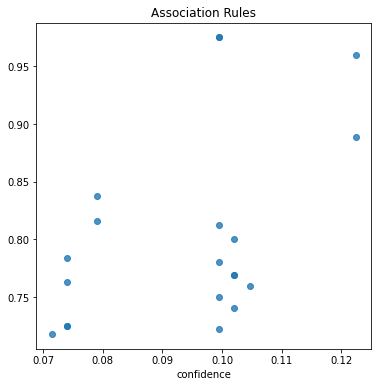

In [22]:
plt.figure(figsize=(6, 6))
plt.title('Association Rules')
plt.xlabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

In [23]:
from mlxtend.frequent_patterns import fpgrowth
itemsets = fpgrowth(basket, min_support=0.07, use_colnames=True)